In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import load_mpl_presets, mpl_loc, fancy_legend, named_colors, markers
import numpy as np
import vice
import sys
import os
sys.path.append("..")
from src import analytic
print(sys.version_info)
load_mpl_presets()

/Users/jamesjohnson/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)


/home/johnson.7419/tmp/ipykernel_3224/1475359845.py:42: RuntimeWarning: invalid value encountered in log10
  eqs[j] = np.log10(zeq(13.2, **kwargs) / vice.solar_z['o'])
/home/johnson.7419/Desktop/Research/galchem/outflows/notebooks/../src/analytic.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / s
/home/johnson.7419/Desktop/Research/galchem/outflows/notebooks/../src/analytic.py:39: RuntimeWarning: invalid value encountered in double_scalars
  term1 *= (1 - m.exp(-time / self.harmonic_timescale(self.taudep,
/home/johnson.7419/Desktop/Research/galchem/outflows/notebooks/../src/analytic.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / s
/home/johnson.7419/Desktop/Research/galchem/outflows/notebooks/../src/analytic.py:39: RuntimeWarning: invalid value encountered in double_scalars
  term1 *= (1 - m.exp(-time / self.harmonic_timescale(self.taudep,


9.090909090909092
4.761904761904762
-7.142857142857142
-24.999999999999996


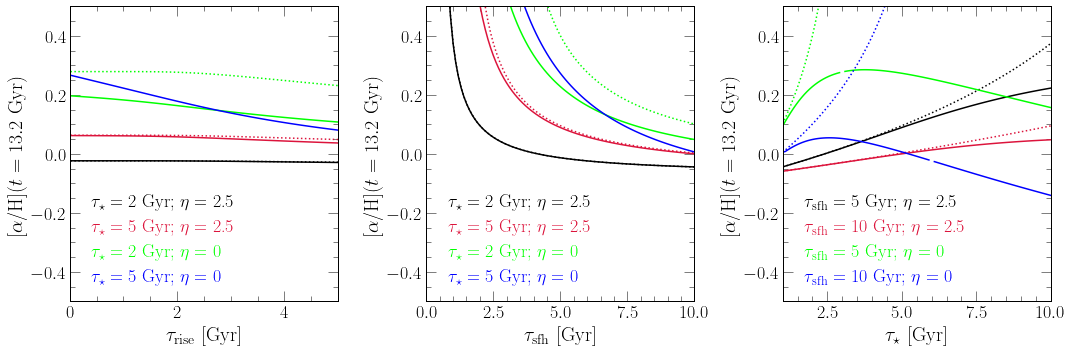

In [30]:
fig = plt.figure(figsize = (15, 5))
axes = []
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_ylabel(r"[$\alpha$/H]($t = 13.2$ Gyr)")
axes[0].set_xlabel(r"$\tau_\text{rise}$ [Gyr]")
axes[0].set_xlim([0, 5])
axes[0].set_ylim([-0.5, 0.5])
axes[1].set_xlabel(r"$\tau_\text{sfh}$ [Gyr]")
axes[1].set_xlim([0, 10])
axes[1].set_ylim([-0.5, 0.5])
axes[2].set_xlabel(r"$\tau_\star$ [Gyr]")
axes[2].set_xlim([1, 10])
axes[2].set_ylim([-0.5, 0.5])

taustar = [2, 5, 2, 5]
eta = [2.5, 2.5, 0, 0]
colors = ["black", "crimson", "lime", "blue"]

Zalpha = analytic.Zalpha()

for i in range(len(taustar)):
    xvals = np.linspace(0.01, 5, 100)
    yvals = len(xvals) * [0.]
    eqs = len(xvals) * [0.]
    Zalpha.taustar = taustar[i]
    Zalpha.eta = eta[i]
    if Zalpha.eta == 0:
        Zalpha.y_alpha = 0.0029
    elif Zalpha.eta == 2.5:
        Zalpha.y_alpha = 0.015
    for j in range(len(xvals)):
        Zalpha.taurise = xvals[j]
        yvals[j] = np.log10(Zalpha(13.2) / vice.solar_z['o'])
        kwargs = {
            "yalpha": Zalpha.y_alpha,
            "eta": Zalpha.eta,
            "taurise": Zalpha.taurise,
            "taustar": Zalpha.taustar,
            "tausfh": Zalpha.tausfh
        }
        eqs[j] = np.log10(zeq(13.2, **kwargs) / vice.solar_z['o'])
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\star = %g$ Gyr; $\eta$ = %g" % (Zalpha.taustar, Zalpha.eta)
    }
    axes[0].plot(xvals, yvals, **kwargs)
    kwargs["label"] = None
    kwargs["linestyle"] = ":"
    axes[0].plot(xvals, eqs, **kwargs)

kwargs = {
    "loc": mpl_loc("lower left"),
    "handlelength": 0,
    "ncol": 1
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)

Zalpha.taurise = 2
for i in range(len(taustar)):
    xvals = np.linspace(0.1, 10, 100)
    yvals = len(xvals) * [0.]
    eqs = len(xvals) * [0.]
    Zalpha.taustar = taustar[i]
    Zalpha.eta = eta[i]
    if Zalpha.eta == 0:
        Zalpha.y_alpha = 0.0029
    elif Zalpha.eta == 2.5:
        Zalpha.y_alpha = 0.015
    for j in range(len(xvals)):
        Zalpha.tausfh = xvals[j]
        yvals[j] = np.log10(Zalpha(13.2) / vice.solar_z['o'])
        kwargs = {
            "yalpha": Zalpha.y_alpha,
            "eta": Zalpha.eta,
            "taurise": Zalpha.taurise,
            "taustar": Zalpha.taustar,
            "tausfh": Zalpha.tausfh
        }
        eqs[j] = zeq(13.2, **kwargs)
        if eqs[j] > 0:
            eqs[j] = np.log10(eqs[j] / vice.solar_z['o'])
        else:
            eqs[j] = float("nan")
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\star = %g$ Gyr; $\eta$ = %g" % (Zalpha.taustar, Zalpha.eta)
    }
    axes[1].plot(xvals, yvals, **kwargs)
    kwargs["label"] = None
    kwargs["linestyle"] = ":"
    axes[1].plot(xvals, eqs, **kwargs)

kwargs = {
    "loc": mpl_loc("lower left"),
    "handlelength": 0,
    "ncol": 1
}
leg = axes[1].legend(**kwargs)
fancy_legend(leg, colors)
        
tausfh = [5, 10, 5, 10]
for i in range(len(tausfh)):
    xvals = np.linspace(1, 10, 100)
    yvals = len(xvals) * [0.]
    eqs = len(xvals) * [0.]
    Zalpha.tausfh = tausfh[i]
    Zalpha.eta = eta[i]
    if Zalpha.eta == 0:
        Zalpha.y_alpha = 0.0029
    elif Zalpha.eta == 2.5:
        Zalpha.y_alpha = 0.015
    for j in range(len(xvals)):
        Zalpha.taustar = xvals[j]
        yvals[j] = np.log10(Zalpha(13.2) / vice.solar_z['o'])
        kwargs = {
            "yalpha": Zalpha.y_alpha,
            "eta": Zalpha.eta,
            "taurise": Zalpha.taurise,
            "taustar": Zalpha.taustar,
            "tausfh": Zalpha.tausfh
        }
        eqs[j] = zeq(13.2, **kwargs)
        if eqs[j] > 0:
            eqs[j] = np.log10(eqs[j] / vice.solar_z['o'])
        else:
            eqs[j] = float("nan")
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\text{sfh}$ = %g Gyr; $\eta$ = %g" % (Zalpha.tausfh, Zalpha.eta)
    }
    print(Zalpha.harmonic_timescale(Zalpha.taustar / (1 + Zalpha.eta - 0.4), Zalpha.tausfh))
    axes[2].plot(xvals, yvals, **kwargs)
    kwargs["label"] = None
    kwargs["linestyle"] = ":"
    axes[2].plot(xvals, eqs, **kwargs)
    
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 1,
    "handlelength": 0
}
leg = axes[2].legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

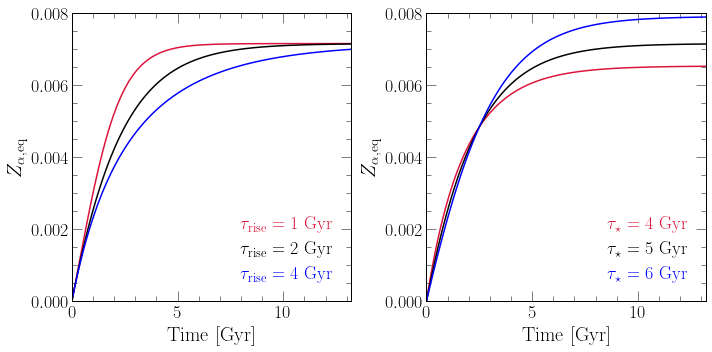

In [12]:
fig = plt.figure(figsize = (10, 5))
axes = []
for i in range(2):
    axes.append(fig.add_subplot(121 + i))
    axes[i].set_xlabel("Time [Gyr]")
    axes[i].set_ylabel(r"$Z_{\alpha,\text{eq}}$")
    axes[i].set_xlim([0, 13.2])
    axes[i].set_ylim([0, 0.008])
    axes[i].set_yticks([0, 0.002, 0.004, 0.006, 0.008])

colors = ["crimson", "black", "blue"]
taurise = [1, 2, 4]
taustar = [4, 5, 6]

def zeq(t, yalpha = 0.015, eta = 2.5, taurise = 2, taustar = 5, tausfh = 5):
    if t == 0: return 0
    denominator = 1 + eta - 0.4
    denominator += taustar * np.exp(-t / taurise) / (taurise * (1 - np.exp(-t / taurise)))
    denominator -= taustar / tausfh
    return yalpha / denominator

xvals = np.linspace(0, 13.2, 100)
for i in range(len(taurise)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\text{rise}$ = %g Gyr" % (taurise[i])
    }
    yvals = [zeq(x, taurise = taurise[i]) for x in xvals]
    axes[0].plot(xvals, yvals, **kwargs)
    
for i in range(len(taustar)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\tau_\star$ = %g Gyr" % (taustar[i])
    }
    yvals = [zeq(x, taustar = taustar[i]) for x in xvals]
    axes[1].plot(xvals, yvals, **kwargs)
    
for i in range(len(axes)):
    kwargs = {
        "loc": mpl_loc("lower right"),
        "bbox_to_anchor": (0.99, 0.01),
        "handlelength": 0
    }
    leg = axes[i].legend(**kwargs)
    fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

In [2]:
class insideoutsfh:
    
    def __init__(self, taurise = 2, tausfh = 5, norm = 10):
        self.taurise = taurise
        self.tausfh = tausfh
        self.norm = norm
        
    def __call__(self, time):
        return self.norm * (1 - np.exp(-time / self.taurise)) * np.exp(-time / self.tausfh)
    
    
class exponential:
    
    def __init__(self, norm = 10, timescale = 1):
        self.norm = norm
        self.timescale = timescale
        
    def __call__(self, time):
        return self.norm * np.exp(-time / self.timescale)

    
def modemdf(bins, dist):
    idxmax = dist.index(max(dist))
    return (bins[idxmax] + bins[idxmax + 1]) / 2

R = 1 kpc
2 * tau_dep = 7.88 Gyr
tau_sfh = 0.09 Gyr
0.09450883302925167
R = 2 kpc
2 * tau_dep = 9.30 Gyr
tau_sfh = 0.22 Gyr
0.22329798801377432
R = 3 kpc
2 * tau_dep = 10.99 Gyr
tau_sfh = 0.40 Gyr
0.39569310496803073
R = 4 kpc
2 * tau_dep = 12.98 Gyr
tau_sfh = 0.62 Gyr
0.6232748931374963
R = 5 kpc
2 * tau_dep = 15.34 Gyr
tau_sfh = 0.92 Gyr
0.9203903563571301
R = 6 kpc
2 * tau_dep = 18.12 Gyr
tau_sfh = 1.30 Gyr
1.3047752776603416
R = 7 kpc
2 * tau_dep = 21.41 Gyr
tau_sfh = 1.80 Gyr
1.7983115041659943
R = 8 kpc
2 * tau_dep = 25.29 Gyr
tau_sfh = 2.43 Gyr
2.4279474525972335
R = 9 kpc
2 * tau_dep = 29.88 Gyr
tau_sfh = 3.23 Gyr
3.2268161306434067
R = 10 kpc
2 * tau_dep = 35.30 Gyr
tau_sfh = 4.24 Gyr
4.235592040376024
R = 11 kpc
2 * tau_dep = 41.70 Gyr
tau_sfh = 5.50 Gyr
5.504136837703969
R = 12 kpc
2 * tau_dep = 49.26 Gyr
tau_sfh = 7.09 Gyr
7.093493854973424
R = 13 kpc
2 * tau_dep = 58.19 Gyr
tau_sfh = 9.08 Gyr
9.078303898268933
R = 14 kpc
2 * tau_dep = 68.75 Gyr
tau_sfh = 11.55 Gyr
11.54972

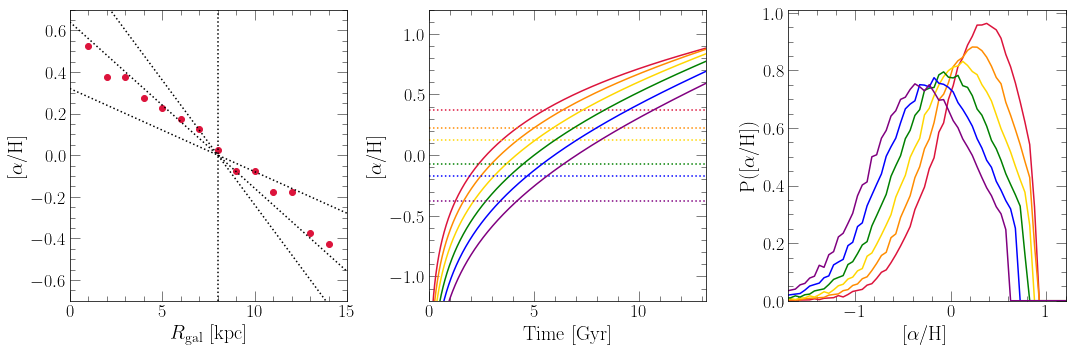

In [38]:
fig = plt.figure(figsize = (15, 5))
axes = []
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
axes[0].set_xlabel(r"$R_\text{gal}$ [kpc]")
axes[0].set_ylabel(r"[$\alpha$/H]")
axes[0].set_xlim([0, 15])
axes[0].set_ylim([-0.7, 0.7])
axes[1].set_xlabel(r"Time [Gyr]")
axes[1].set_ylabel(r"[$\alpha$/H]")
axes[1].set_xlim([0, 13.2])
axes[1].set_ylim([-1.2, 1.2])
axes[2].set_xlabel(r"[$\alpha$/H]")
axes[2].set_ylabel(r"P([$\alpha$/H])")
axes[2].set_xlim([-1.7, 1.2])
# axes[2].set_ylim([0, 1.1])

def reference_gradient(r, slope = -0.08):
    return slope * (r - 8)

xvals = np.linspace(0, 15, 100)
for slope in [-0.04, -0.08, -0.12]:
    yvals = [reference_gradient(x, slope = slope) for x in xvals]
    kwargs = {
        "c": named_colors()["black"],
        "linestyle": ":"
    }
    axes[0].plot(xvals, yvals, **kwargs)
axes[0].axvline(8, **kwargs)


vice.yields.ccsne.settings['o'] = 2 * vice.solar_z['o']

Rg = 3 # kpc
A = 0.08 # dex / kpc
Zsun = vice.solar_z['o']
y_alpha = vice.yields.ccsne.settings['o']
C = 0 # Gyr
N = 1.5 # Kennicutt-Schmidt power-law index
taustar0 = 2 # Gyr
def taustar(r):
#     return 2 * np.exp(r / 6)
    return taustar0 * np.exp((N - 1) * r / Rg)

def tausfh(r):
    tausfh0 = A * Zsun * taustar0 * r / y_alpha + 0
    return tausfh0 * np.exp((N - 1) * r / Rg)
#     return 3 * np.exp(r / 2)

radii = list(range(1, 15))
special = [3, 5, 7, 9, 11, 13]
colors = ["crimson", "darkorange", "gold", "green", "blue", "purple"]

for r in radii:
#     sys.stdout.write("\rR = %d kpc" % (r))
    print("R = %d kpc" % (r))
    taudep = taustar(r) / (1 - 0.4)
    print("2 * tau_dep = %.2f Gyr" % (2 * taudep))
    print("tau_sfh = %.2f Gyr" % (tausfh(r)))
    with vice.singlezone(name = "tmp", elements = ["o"]) as sz:
        sz.mode = "sfr"
        sz.func = insideoutsfh()
#         sz.func = exponential()
        sz.func.timescale = tausfh(r)
        sz.tau_star = taustar(r)
        sz.eta = 0
#         sz.recycling = 0.4
        sz.bins = np.linspace(-3, 2, 101)
        out = sz.run(np.linspace(0, 13.2, 1321), overwrite = True, capture = True)
        mode = modemdf(out.mdf["bin_edge_left"] + [out.mdf["bin_edge_right"][-1]],
            out.mdf["dn/d[o/h]"])
        axes[0].scatter([r], [mode], c = named_colors()["crimson"])
        if r in special:
            color = colors[special.index(r)]
            kwargs = {"c": named_colors()[color], "label": r"%d kpc" % (r)}
            axes[1].plot(out.history["time"], out.history["[o/h]"], **kwargs)
            axes[1].axhline(mode, c = named_colors()[color], linestyle = ':')
            centers = [(a + b) / 2 for a, b in zip(out.mdf["bin_edge_left"], out.mdf["bin_edge_right"])]
            axes[2].plot(centers, out.mdf["dn/d[o/h]"], **kwargs)
        else: pass
#         taudep = sz.tau_star / (1 - 0.4)
#         if sz.func.timescale < 2 * taudep:
#             tmax = -(1 / taudep - 1 / sz.func.timescale)**(-1) * np.log(2 - sz.func.timescale / taudep)
#             if tmax > out.history["time"][-1]: tmax = None
#         else:
#             tmax = None
#         if tmax is None:
#             mode = np.log10(out.history["z(o)"][-1] / vice.solar_z['o'])
#         else:
#             zeq = vice.yields.ccsne.settings['o'] / (1 - 0.4 - sz.tau_star / sz.func.timescale)
#             mode = np.log10(zeq / vice.solar_z['o'] * (sz.func.timescale / taudep - 1))
#         axes[0].scatter([r], [mode], c = named_colors()["black"], marker = markers()["x"])
# sys.stdout.write("\n")

# kwargs = {
#     "loc": mpl_loc("upper left"),
#     "handlelength": 0
# }
# leg = axes[2].legend(**kwargs)
# fancy_legend(leg, colors)

axes[2].set_ylim([0, axes[2].get_ylim()[1]])
plt.tight_layout()
plt.show()